Выполнил: Кузнецов Константин  
Группа: 381906-2м

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
data_filepath = "data/kc_house_data.csv"
data = pd.read_csv(data_filepath)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
- id - unique id for each home sold
- date - date of the home sale
- price - price of each home sold
- bedrooms - number of bedrooms
- bathrooms - number of bathrooms, where 0.5 accounts for a room with a toilet but no shower
- sqft_living - square footage of the apartments interior living space
- sqft_lot - square footage of the land space
- floors - number of floors
- waterfront - a dummy variable for whether the apartment was overlooking the waterfront or not
- view - an index from 0 to 4 of how good the view of the property was
- condition - an index from 1 to 5 on the condition of the apartment
- grade - an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
- sqft_above - the square footage of the interior housing space that is above ground level
- sqft_basement - the square footage of the interior housing space that is below ground level
- yr_built - the year the house was initially built
- yr_renovated - the year of the houses's last renovation
- zipcode - what zipcode area the house is in
- lat - latitude
- long - longitude
- sqft_living15 - the square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot - the square foot of the land lots of the nearest 15 neighbors

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


Отсутствуют ненулевые значения

# Преобразуем данные

Удалим некоторые столбцы  
*zipcode* - категориальный признак

In [4]:
data.drop(['id','sqft_living15','sqft_lot15'], axis = 1, inplace=True)
data['zipcode'] = data['zipcode'].astype('category')

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000


# Визуализируем данные

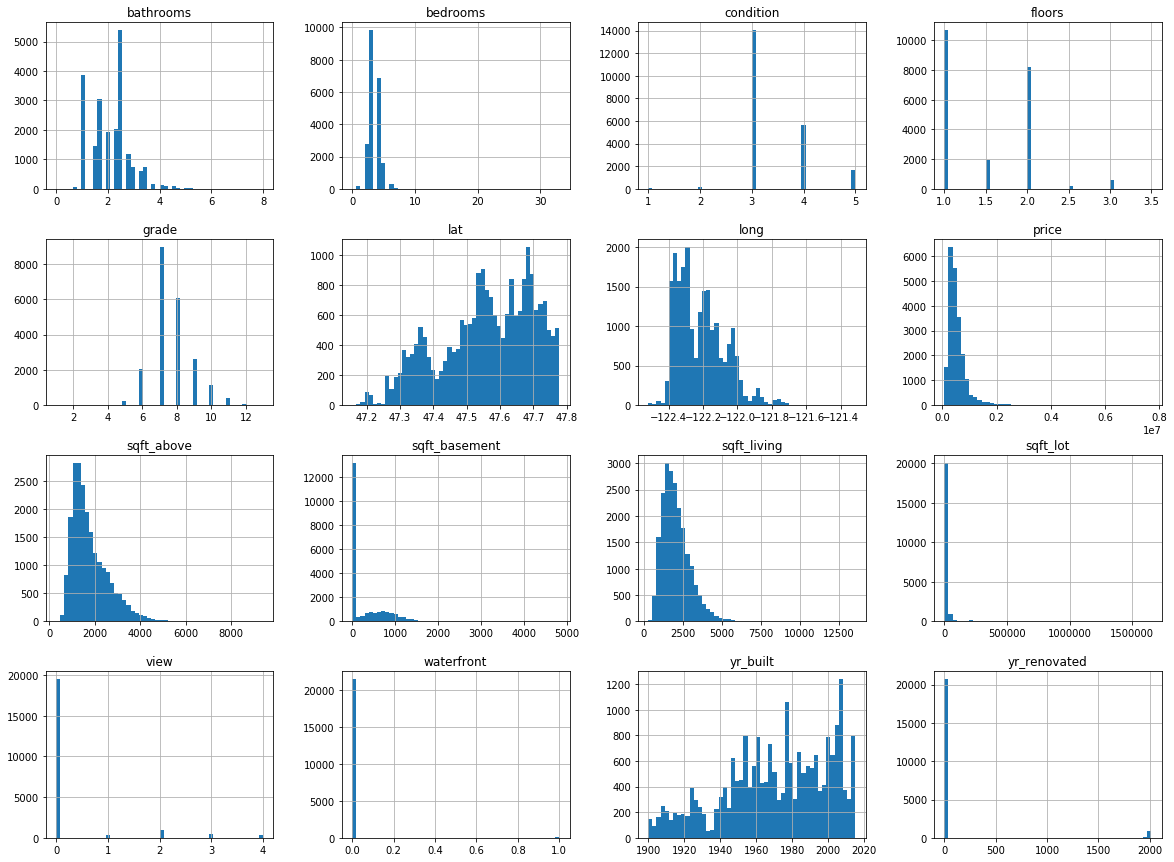

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Убираем дома с большой стоимостью (так как их мало) и строим график со стоимостью домов и их расположением

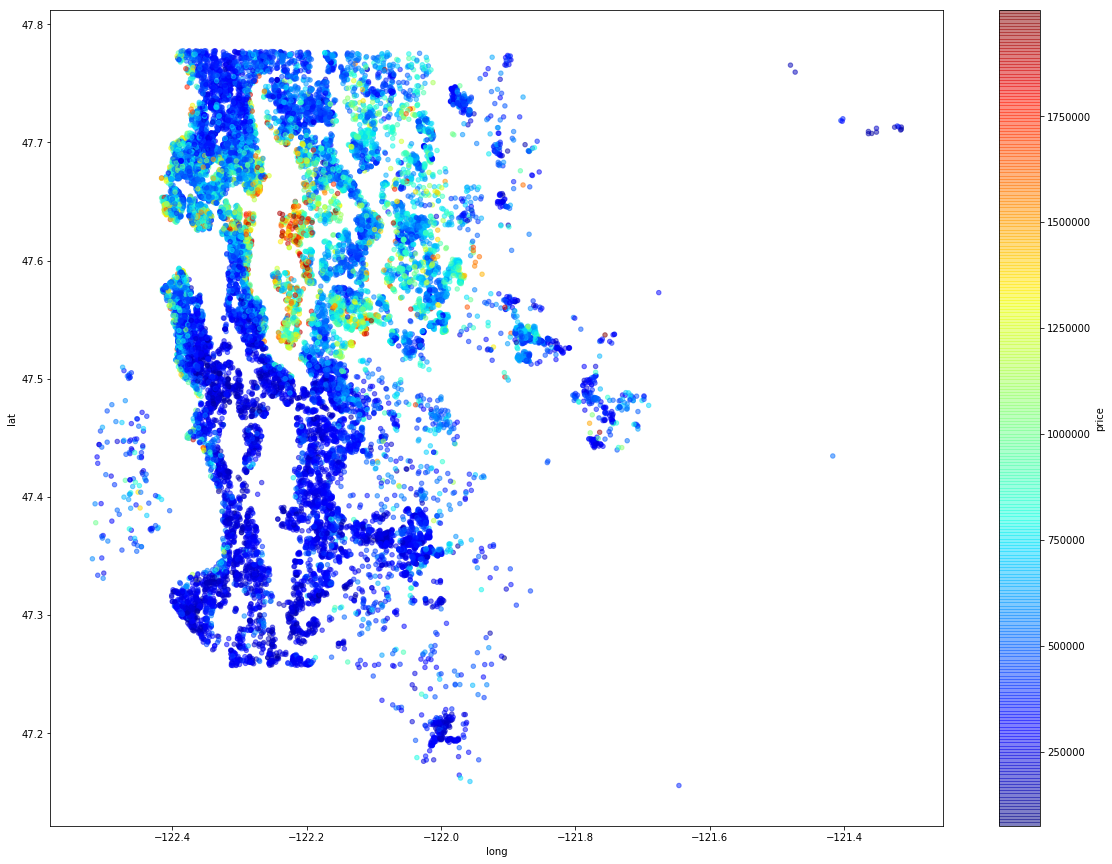

In [7]:
data_to_plot = data.copy()
data_to_plot['price'] = data_to_plot[data_to_plot['price'] < 2000000]['price']
data_to_plot.dropna()
data_to_plot.plot(kind="scatter", x="long", y="lat", alpha = 0.5, figsize=(20,15),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

Посмотрим на зависимости между данными

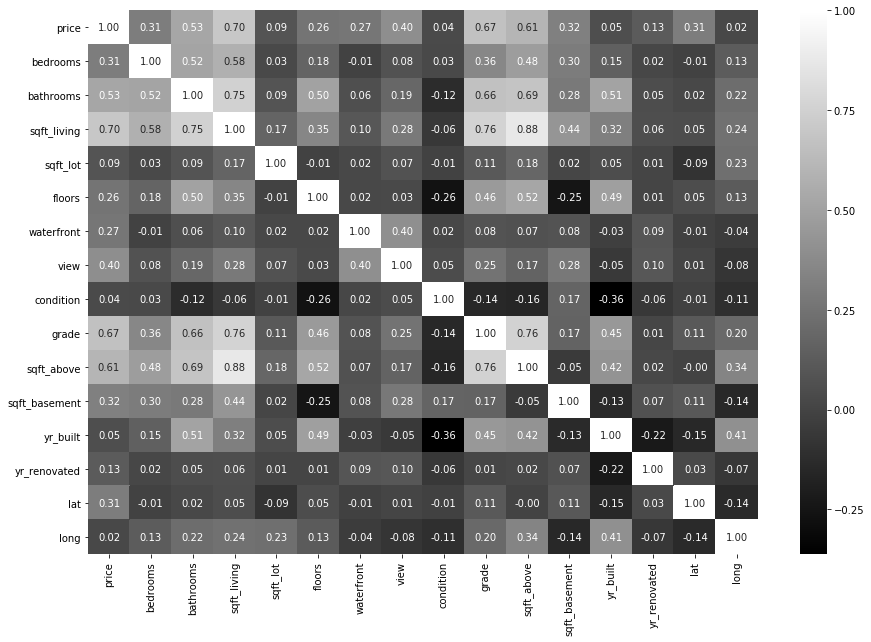

In [8]:
corr_matrix = data.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=plt.cm.gray)
plt.show()

In [9]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

Посмотрим на зависимость цены от площади дома

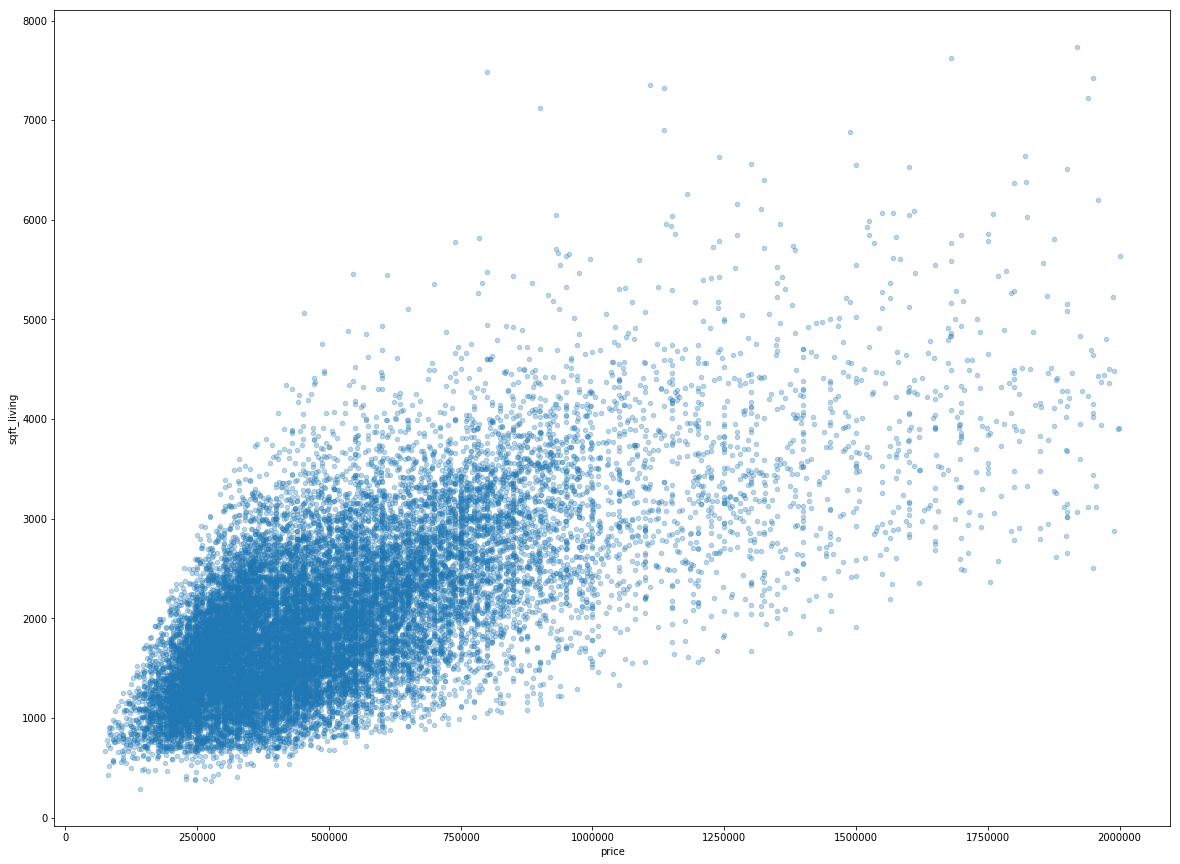

In [10]:
data_to_plot = data.copy()
data_to_plot['price'] = data_to_plot[data_to_plot['price'] < 2000000]['price']
data_to_plot.dropna()
data_to_plot.plot(kind="scatter",x="price",y="sqft_living", figsize=(20,15), alpha=0.3)